#<center> ALY6080 - XN Project
### <center> Predicting the daily ED
 
### <center> Visit rate for asthma by air pollutant concentrations
#####<center> 2021/Jun/27 </center>

##### Professor: Valerie Atherley
##### Class: ALY6080 - Integrated Experiential Learning
##### Team 6: Fang-Chun Yeh, Ying Wang, Rongjun Yin, Shanglun Yang, Xiaopeng Wang

### **Step 1: Load the Dependencies**

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
from functools import reduce
import io
from scipy.stats import norm, skew
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import OrderedDict
from pandas.api import types
from six import string_types
from sklearn.linear_model import LinearRegression

### **Step 2: Data Preparation**

In [3]:
'''
Load the data from your cloud drive.
If runnig the script locally, please put the data in the folder "Data for ALY6080" to your python directory, ignore this section and run next section.

'''

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Data for ALY6080' 
!ls

ModuleNotFoundError: No module named 'google.colab'

In [9]:
# Load Data

# 1. CO data
co_2010 = pd.read_csv('co_2010.csv')
co_2011 = pd.read_csv('co_2011.csv')
co_2012 = pd.read_csv('co_2012.csv')
co_2013 = pd.read_csv('co_2013.csv')
co_2014 = pd.read_csv('co_2014.csv')
co_2015 = pd.read_csv('co_2015.csv')
co_2016 = pd.read_csv('co_2016.csv')
co_2017 = pd.read_csv('co_2017.csv')
co_2018 = pd.read_csv('co_2018.csv')
co_2019 = pd.read_csv('co_2019.csv')

# 2. NO2 data
no2_2010 = pd.read_csv('no2_2010.csv')
no2_2011 = pd.read_csv('no2_2011.csv')
no2_2012 = pd.read_csv('no2_2012.csv')
no2_2013 = pd.read_csv('no2_2013.csv')
no2_2014 = pd.read_csv('no2_2014.csv')
no2_2015 = pd.read_csv('no2_2015.csv')
no2_2016 = pd.read_csv('no2_2016.csv')
no2_2017 = pd.read_csv('no2_2017.csv')
no2_2018 = pd.read_csv('no2_2018.csv')
no2_2019 = pd.read_csv('no2_2019.csv')

# 3. O3 data
o3_2010 = pd.read_csv('o3_2010.csv')
o3_2011 = pd.read_csv('o3_2011.csv')
o3_2012 = pd.read_csv('o3_2012.csv')
o3_2013 = pd.read_csv('o3_2013.csv')
o3_2014 = pd.read_csv('o3_2014.csv')
o3_2015 = pd.read_csv('o3_2015.csv')
o3_2016 = pd.read_csv('o3_2016.csv')
o3_2017 = pd.read_csv('o3_2017.csv')
o3_2018 = pd.read_csv('o3_2018.csv')
o3_2019 = pd.read_csv('o3_2019.csv')

# 4. Pb data
pb_2010 = pd.read_csv('pb_2010.csv')
pb_2011 = pd.read_csv('pb_2011.csv')
pb_2012 = pd.read_csv('pb_2012.csv')
pb_2013 = pd.read_csv('pb_2013.csv')
pb_2014 = pd.read_csv('pb_2014.csv')
pb_2015 = pd.read_csv('pb_2015.csv')
pb_2016 = pd.read_csv('pb_2016.csv')
pb_2017 = pd.read_csv('pb_2017.csv')
pb_2018 = pd.read_csv('pb_2018.csv')
pb_2019 = pd.read_csv('pb_2019.csv')

# 5. PM10 data
pm10_2010 = pd.read_csv('pm10_2010.csv')
pm10_2011 = pd.read_csv('pm10_2011.csv')
pm10_2012 = pd.read_csv('pm10_2012.csv')
pm10_2013 = pd.read_csv('pm10_2013.csv')
pm10_2014 = pd.read_csv('pm10_2014.csv')
pm10_2015 = pd.read_csv('pm10_2015.csv')
pm10_2016 = pd.read_csv('pm10_2016.csv')
pm10_2017 = pd.read_csv('pm10_2017.csv')
pm10_2018 = pd.read_csv('pm10_2018.csv')
pm10_2019 = pd.read_csv('pm10_2019.csv')

# 6. PM2.5 data
pm25_2010 = pd.read_csv('pm2.5_2010.csv')
pm25_2011 = pd.read_csv('pm2.5_2011.csv')
pm25_2012 = pd.read_csv('pm2.5_2012.csv')
pm25_2013 = pd.read_csv('pm2.5_2013.csv')
pm25_2014 = pd.read_csv('pm2.5_2014.csv')
pm25_2015 = pd.read_csv('pm2.5_2015.csv')
pm25_2016 = pd.read_csv('pm2.5_2016.csv')
pm25_2017 = pd.read_csv('pm2.5_2017.csv')
pm25_2018 = pd.read_csv('pm2.5_2018.csv')
pm25_2019 = pd.read_csv('pm2.5_2019.csv')

# 7. SO2 data 
so2_2010 = pd.read_csv('so2_2010.csv')
so2_2011 = pd.read_csv('so2_2011.csv')
so2_2012 = pd.read_csv('so2_2012.csv')
so2_2013 = pd.read_csv('so2_2013.csv')
so2_2014 = pd.read_csv('so2_2014.csv')
so2_2015 = pd.read_csv('so2_2015.csv')
so2_2016 = pd.read_csv('so2_2016.csv')
so2_2017 = pd.read_csv('so2_2017.csv')
so2_2018 = pd.read_csv('so2_2018.csv')
so2_2019 = pd.read_csv('so2_2019.csv')

In [10]:
# Connect the same air pollutant in different year together

co   = pd.concat([co_2010,   co_2011,   co_2012,   co_2013,   co_2014,   co_2015,   co_2016,   co_2017,   co_2018,   co_2019],   axis = 0)
no2  = pd.concat([no2_2010,  no2_2011,  no2_2012,  no2_2013,  no2_2014,  no2_2015,  no2_2016,  no2_2017,  no2_2018,  no2_2019],  axis = 0)
o3   = pd.concat([o3_2010,   o3_2011,   o3_2012,   o3_2013,   o3_2014,   o3_2015,   o3_2016,   o3_2017,   o3_2018,   o3_2019],   axis = 0)
pb   = pd.concat([pb_2010,   pb_2011,   pb_2012,   pb_2013,   pb_2014,   pb_2015,   pb_2016,   pb_2017,   pb_2018,   pb_2019],   axis = 0)
pm10 = pd.concat([pm10_2010, pm10_2011, pm10_2012, pm10_2013, pm10_2014, pm10_2015, pm10_2016, pm10_2017, pm10_2018, pm10_2019], axis = 0)
pm25 = pd.concat([pm25_2010, pm25_2011, pm25_2012, pm25_2013, pm25_2014, pm25_2015, pm25_2016, pm25_2017, pm25_2018, pm25_2019], axis = 0)
so2  = pd.concat([so2_2010,  so2_2011,  so2_2012,  so2_2013,  so2_2014,  so2_2015,  so2_2016,  so2_2017,  so2_2018,  so2_2019],  axis = 0)

In [11]:
# Convert Date data into standardard format

co['date']   = co['Date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
no2['date']  = no2['Date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
o3['date']   = o3['Date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
pb['date']   = pb['Date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
pm10['date'] = pm10['Date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
pm25['date'] = pm25['Date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
so2['date']  = so2['Date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))

In [12]:
# Obtain year and month information

co['year']    = pd.DatetimeIndex(co['date']).year
co['month']   = pd.DatetimeIndex(co['date']).month
no2['year']   = pd.DatetimeIndex(no2['date']).year
no2['month']  = pd.DatetimeIndex(no2['date']).month
o3['year']    = pd.DatetimeIndex(o3['date']).year
o3['month']   = pd.DatetimeIndex(o3['date']).month
pb['year']    = pd.DatetimeIndex(pb['date']).year
pb['month']   = pd.DatetimeIndex(pb['date']).month
pm10['year']  = pd.DatetimeIndex(pm10['date']).year
pm10['month'] = pd.DatetimeIndex(pm10['date']).month
pm25['year']  = pd.DatetimeIndex(pm25['date']).year
pm25['month'] = pd.DatetimeIndex(pm25['date']).month
so2['year']   = pd.DatetimeIndex(so2['date']).year
so2['month']  = pd.DatetimeIndex(so2['date']).month

In [13]:
# Obtain Monthly air pollutant average information

df_co   = pd.DataFrame( data  = co.groupby(['year', 'month']).mean()['Daily Max 8-hour CO Concentration']) 
df_no2  = pd.DataFrame( data  = no2.groupby(['year', 'month']).mean()['Daily Max 1-hour NO2 Concentration'])
df_o3   = pd.DataFrame( data  = o3.groupby(['year', 'month']).mean()['Daily Max 8-hour Ozone Concentration'])
df_pb   = pd.DataFrame( data  = pb.groupby(['year', 'month']).mean()['Daily Mean Pb Concentration'])
df_pm10 = pd.DataFrame( data  = pm10.groupby(['year', 'month']).mean()['Daily Mean PM10 Concentration']) 
df_pm25 = pd.DataFrame( data  = pm25.groupby(['year', 'month']).mean()['Daily Mean PM2.5 Concentration'])
df_so2  = pd.DataFrame( data  = so2.groupby(['year', 'month']).mean()['Daily Max 1-hour SO2 Concentration'])

In [14]:
# Load Emergency Department (ED) data

df_ed = pd.read_csv('Iowa_ED_Data.csv')
df_ed.set_index(['year', 'month'])



# Merge ED data with air pollutant data

dfs = [df_pm10, df_pm25, df_no2, df_so2, df_co, df_o3, df_pb]
for df in dfs:
  df_ed = df_ed.merge(df, how = 'left', right_index = True, left_on=['year', 'month'])

df_ed.head(5)  

,year,month,avg_daily_ED_visit,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 1-hour SO2 Concentration,Daily Max 8-hour CO Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration
0,2010,1,26.74,19.024096,16.826350,21.580488,1.445055,0.324719,NaN,0.025500
1,2010,2,32.39,25.548780,20.917236,22.774419,1.935714,0.337662,NaN,0.025400
2,2010,3,37.55,23.980620,14.469787,21.280645,2.710227,0.353571,NaN,0.148800
3,2010,4,39.53,29.896825,11.556957,18.839286,3.810429,0.341860,0.049666,0.184556
4,2010,5,37.71,18.878906,8.398320,19.206452,1.899441,0.307865,0.046612,0.075100


In [15]:
# Check if any missing values in a column

for col in df_ed.columns:
  if df_ed[col].isnull().values.any() == True:
    print(col)

Daily Max 8-hour Ozone Concentration


In [16]:
# Fill the missing values with the mean value

df_ed['Daily Max 8-hour Ozone Concentration'] = df_ed['Daily Max 8-hour Ozone Concentration'].fillna(df_ed['Daily Max 8-hour Ozone Concentration'].mean())

In [17]:
# Save the data to csv and read the data using different name

df_ed.to_csv('iowa_data.csv', index = False)
df_data = pd.read_csv('iowa_data.csv')

In [18]:
# Create a new column based on the ten-year ED visit rate (per 10,000 residents)

df_data['avg_daily_ED_visit'].mean()

def over_mean(value):
    if value > 30.92966666666668:
        return 1
    else:
        return 0
df_data['over_average'] = df_data['avg_daily_ED_visit'].apply(over_mean)
df_data.head(3)

,year,month,avg_daily_ED_visit,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 1-hour SO2 Concentration,Daily Max 8-hour CO Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,over_average
0,2010,1,26.74,19.024096,16.826350,21.580488,1.445055,0.324719,0.036367,0.0255,0
1,2010,2,32.39,25.548780,20.917236,22.774419,1.935714,0.337662,0.036367,0.0254,1
2,2010,3,37.55,23.980620,14.469787,21.280645,2.710227,0.353571,0.036367,0.1488,1


### **Step 3. Exploratory Data Analysis (EDA)**

#### Step 3 - 1. Descriptive table

In [19]:
# @markdown Define a DataFrameSummary function (code obtained fron Github)

class DataFrameSummary(object):
    ALL = 'ALL'
    INCLUDE = 'INCLUDE'
    EXCLUDE = 'EXCLUDE'

    TYPE_BOOL = 'bool'
    TYPE_NUMERIC = 'numeric'
    TYPE_DATE = 'date'
    TYPE_CATEGORICAL = 'categorical'
    TYPE_CONSTANT = 'constant'
    TYPE_UNIQUE = 'unique'

    def __init__(self, df, plot=False):
        self.df = df
        self.length = len(df)
        self.columns_stats = self._get_stats()
        self.corr = df.corr()
        self.plot = plot

    def __getitem__(self, column):
        if isinstance(column, str) and self._clean_column(column):
            return self._get_column_summary(column)

        if isinstance(column, int) and column < self.df.shape[1]:
            return self._get_column_summary(self.df.columns[column])

        if isinstance(column, (tuple, list)):
            error_keys = [k for k in column if not self._clean_column(k)]
            if len(error_keys) > 0:
                raise KeyError(', '.join(error_keys))
            return self.df[list(column)].values

        if isinstance(column, pd.Index):
            error_keys = [
                k for k in column.values if not self._clean_column(k)]
            if len(error_keys) > 0:
                raise KeyError(', '.join(error_keys))
            return self.df[column].values

        if isinstance(column, np.ndarray):
            error_keys = [k for k in column if not self._clean_column(k)]
            if len(error_keys) > 0:
                raise KeyError(', '.join(error_keys))
            return self.df[column].values

        raise KeyError(column)

    @property
    def columns_types(self):
        return pd.value_counts(self.columns_stats.loc['types'])

    def summary(self):
        return pd.concat([self.df.describe(), self.columns_stats], sort=True)[self.df.columns]

    @staticmethod
    def _number_format(x):
        eps = 0.000000001
        num_format = '{0:,.0f}' if abs(int(x) - x) < eps else '{0:,.2f}'
        return num_format.format(x)

    @classmethod
    def _percent(cls, x):
        x = cls._number_format(100 * x)
        return '{}%'.format(x)

    def _clean_column(self, column):
        if not isinstance(column, (int, string_types)):
            raise ValueError('{} is not a valid column'.format(column))
        return column in self.df.columns

    def _get_stats(self):
        counts = self.df.count()
        counts.name = 'counts'
        uniques = self._get_uniques()
        missing = self._get_missing(counts)
        stats = pd.concat([counts, uniques, missing], axis=1, sort=True)

        # settings types
        stats['types'] = ''
        columns_info = self._get_columns_info(stats)
        for ctype, columns in columns_info.items():
            stats.loc[columns, 'types'] = ctype
        return stats.transpose()[self.df.columns]

    def _get_uniques(self):
        return pd.Series(dict((c, self.df[c].nunique()) for c in self.df.columns), name='uniques')

    def _get_missing(self, counts):
        count = self.length - counts
        count.name = 'missing'
        perc = (count / self.length).apply(self._percent)
        perc.name = 'missing_perc'
        return pd.concat([count, perc], axis=1, sort=True)

    def _get_columns_info(self, stats):
        column_info = {}
        column_info[self.TYPE_CONSTANT] = stats['uniques'][stats['uniques'] == 1].index
        column_info[self.TYPE_BOOL] = stats['uniques'][stats['uniques'] == 2].index
        rest_columns = self.get_columns(self.df,
                                        self.EXCLUDE,
                                        column_info['constant'].union(column_info['bool']))
        column_info[self.TYPE_NUMERIC] = pd.Index([c for c in rest_columns
                                                   if types.is_numeric_dtype(self.df[c])])
        rest_columns = self.get_columns(
            self.df[rest_columns], self.EXCLUDE, column_info['numeric'])
        column_info[self.TYPE_DATE] = pd.Index([c for c in rest_columns
                                                if types.is_datetime64_dtype(self.df[c])])
        rest_columns = self.get_columns(
            self.df[rest_columns], self.EXCLUDE, column_info['date'])
        unique_columns = stats['uniques'][rest_columns] == stats['counts'][rest_columns]
        column_info[self.TYPE_UNIQUE] = stats['uniques'][rest_columns][unique_columns].index
        column_info[self.TYPE_CATEGORICAL] = stats['uniques'][rest_columns][~unique_columns].index
        return column_info

    """ Column summaries """

    def _get_deviation_of_mean(self, series, multiplier=3):
        """
        Returns count of values deviating of the mean, i.e. larger than `multiplier` * `std`.
        :type series:
        :param multiplier:
        :return:
        """
        capped_series = np.minimum(
            series, series.mean() + multiplier * series.std())
        count = pd.value_counts(series != capped_series)
        count = count[True] if True in count else 0
        perc = self._percent(count / self.length)
        return count, perc

    def _get_median_absolute_deviation(self, series, multiplier=3):
        """
        Returns count of values larger than `multiplier` * `mad`
        :type series:
        :param multiplier:
        :return (array):
        """
        capped_series = np.minimum(
            series, series.median() + multiplier * series.mad())
        count = pd.value_counts(series != capped_series)
        count = count[True] if True in count else 0
        perc = self._percent(count / self.length)
        return count, perc

    def _get_top_correlations(self, column, threshold=0.65, top=3):
        column_corr = np.fabs(self.corr[column].drop(column)).sort_values(ascending=False,
                                                                          inplace=False)
        top_corr = column_corr[(column_corr > threshold)][:top].index
        correlations = self.corr[column][top_corr].to_dict()
        return ', '.join('{}: {}'.format(col, self._percent(val)) for
                         col, val in correlations.items())

    def _get_numeric_summary(self, column):
        series = self.df[column]

        if self.plot:
            try:
                series.hist()
            except ImportError:
                pass

        stats = OrderedDict()
        stats['mean'] = series.mean()
        stats['std'] = series.std()
        stats['variance'] = series.var()
        stats['min'] = series.min()
        stats['max'] = series.max()
        stats['mode'] = series.mode()[0]

        for x in np.array([0.05, 0.25, 0.5, 0.75, 0.95]):
            stats[self._percent(x)] = series.quantile(x)

        stats['iqr'] = stats['75%'] - stats['25%']
        stats['kurtosis'] = series.kurt()
        stats['skewness'] = series.skew()
        stats['sum'] = series.sum()
        stats['mad'] = series.mad()
        stats['cv'] = stats['std'] / stats['mean'] if stats['mean'] else np.nan
        stats['zeros_num'] = self.length - np.count_nonzero(series)
        stats['zeros_perc'] = self._percent(stats['zeros_num'] / self.length)
        deviation_of_mean, deviation_of_mean_perc = self._get_deviation_of_mean(
            series)
        stats['deviating_of_mean'] = deviation_of_mean
        stats['deviating_of_mean_perc'] = deviation_of_mean_perc
        deviating_of_median, deviating_of_median_perc = self._get_median_absolute_deviation(
            series)
        stats['deviating_of_median'] = deviating_of_median
        stats['deviating_of_median_perc'] = deviating_of_median_perc
        stats['top_correlations'] = self._get_top_correlations(column)
        return pd.concat([pd.Series(stats, name=column),
                          self.columns_stats[column]],
                         sort=True)

    def _get_date_summary(self, column):
        series = self.df[column]
        stats = {'min': series.min(), 'max': series.max()}
        stats['range'] = stats['max'] - stats['min']
        return pd.concat([pd.Series(stats, name=column),
                          self.columns_stats[column]],
                         sort=True)

    def _get_categorical_summary(self, column):
        series = self.df[column]
        # Only run if at least 1 non-missing value
        value_counts = series.value_counts()
        stats = {
            'top': '{}: {}'.format(value_counts.index[0], value_counts.iloc[0]),
        }
        return pd.concat([pd.Series(stats, name=column),
                          self.columns_stats[column]],
                         sort=True)

    def _get_constant_summary(self, column):
        return 'This is a constant value: {}'.format(self.df[column][0])

    def _get_bool_summary(self, column):
        series = self.df[column]

        stats = {}
        for class_name, class_value in dict(series.value_counts()).items():
            stats['"{}" count'.format(class_name)] = '{}'.format(class_value)
            stats['"{}" perc'.format(class_name)] = '{}'.format(
                self._percent(class_value / self.length))

        return pd.concat([pd.Series(stats, name=column),
                          self.columns_stats[column]],
                         sort=True)

    def _get_unique_summary(self, column):
        return self.columns_stats[column]

    def _get_column_summary(self, column):
        column_type = self.columns_stats.loc['types'][column]
        if column_type == self.TYPE_NUMERIC:
            return self._get_numeric_summary(column)
        if column_type == self.TYPE_CATEGORICAL:
            return self._get_categorical_summary(column)
        if column_type == self.TYPE_BOOL:
            return self._get_bool_summary(column)
        if column_type == self.TYPE_UNIQUE:
            return self._get_unique_summary(column)
        if column_type == self.TYPE_DATE:
            return self._get_date_summary(column)
        if column_type == self.TYPE_CONSTANT:
            return self._get_constant_summary(column)

    @property
    def constants(self):
        return self.df.columns[self.columns_stats.loc['types'] == 'constant']

    @property
    def categoricals(self):
        return self.df.columns[self.columns_stats.loc['types'] == 'categorical']

    @property
    def numerics(self):
        return self.df.columns[self.columns_stats.loc['types'] == 'numeric']

    @property
    def uniques(self):
        return self.df.columns[self.columns_stats.loc['types'] == 'unique']

    @property
    def bools(self):
        return self.df.columns[self.columns_stats.loc['types'] == 'bool']

    @property
    def missing_frac(self):
        return self.columns_stats.loc['missing'].apply(lambda x: float(x) / self.length)

    def get_columns(self, df, usage, columns=None):
        """
        Returns a `data_frame.columns`.
        :param df: dataframe to select columns from
        :param usage: should be a value from [ALL, INCLUDE, EXCLUDE].
                            this value only makes sense if attr `columns` is also set.
                            otherwise, should be used with default value ALL.
        :param columns: * if `usage` is all, this value is not used.
                        * if `usage` is INCLUDE, the `df` is restricted to the intersection
                          between `columns` and the `df.columns`
                        * if usage is EXCLUDE, returns the `df.columns` excluding these `columns`
        :return: `data_frame` columns, excluding `target_column` and `id_column` if given.
                 `data_frame` columns, including/excluding the `columns` depending on `usage`.
        """
        columns_excluded = pd.Index([])
        columns_included = df.columns

        if usage == self.INCLUDE:
            try:
                columns_included = columns_included.intersection(pd.Index(columns))
            except TypeError:
                pass
        elif usage == self.EXCLUDE:
            try:
                columns_excluded = columns_excluded.union(pd.Index(columns))
            except TypeError:
                pass

        columns_included = columns_included.difference(columns_excluded)
        return columns_included.intersection(df.columns)

In [20]:
# Get the summary of the Iowa data and save it to csv file

df_data_summary = DataFrameSummary(df_data)
df_summary = DataFrame( data = df_data_summary.summary(), columns = df_data.columns)  
df_summary_T = df_summary.T
df_summary_T.to_csv('summary.csv')
df_summary_T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
year,120,2014.5,2.88432,2010,2012,2014.5,2017,2019,120,10,0,0%,numeric
month,120,6.5,3.46653,1,3.75,6.5,9.25,12,120,12,0,0%,numeric
avg_daily_ED_visit,120,30.9297,7.51693,17.68,25.625,29.67,35.2625,57.03,120,114,0,0%,numeric
Daily Mean PM10 Concentration,120,24.9766,4.9752,15.0849,21.4425,24.5977,27.8562,38.1966,120,120,0,0%,numeric
Daily Mean PM2.5 Concentration,120,9.43864,2.43806,5.20055,7.8719,9.15985,10.4207,20.9172,120,120,0,0%,numeric
Daily Max 1-hour NO2 Concentration,120,12.9425,3.52813,5.46833,10.2462,12.2696,15.0951,22.7744,120,120,0,0%,numeric
Daily Max 1-hour SO2 Concentration,120,3.98993,2.54175,0.985171,1.9096,3.22104,5.44093,12.5762,120,120,0,0%,numeric
Daily Max 8-hour CO Concentration,120,0.316912,0.0979268,0.221687,0.260536,0.287837,0.327714,0.76648,120,120,0,0%,numeric
Daily Max 8-hour Ozone Concentration,120,0.0363667,0.00845333,0.01815,0.0295021,0.0367804,0.0424688,0.0539017,120,116,0,0%,numeric
Daily Mean Pb Concentration,120,0.0693063,0.0575702,0.00581818,0.0331071,0.0507353,0.0821667,0.2822,120,120,0,0%,numeric


#### Step 3 - 2. Q1 - How does average daily Emergency Department (ED) visits for Asthma in Iowa distribute?

C:\Users\user\miniconda3\envs\awesome\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

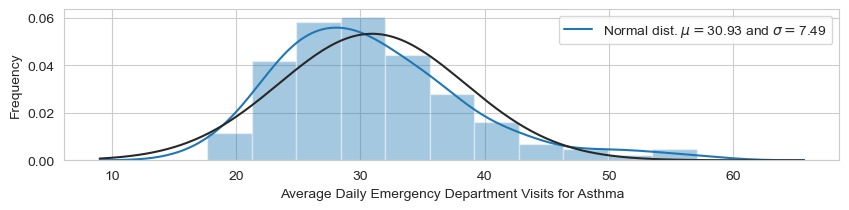

In [21]:
plt.figure(figsize = (10,2), dpi = 100)
sns.distplot(df_data['avg_daily_ED_visit'], fit = norm)
(mu, sigma) = norm.fit(df_data['avg_daily_ED_visit'])
plt.legend(['Normal dist. $\mu = ${:.2f} and $\sigma = ${:.2f}'.format(mu, sigma)], loc = 'upper right')
plt.xlabel('Average Daily Emergency Department Visits for Asthma')
plt.ylabel('Frequency')

#### Step 3 - 3. Q2 - Visualize the relationship between SO2 concentration and ED visit rate for asthma.

Text(0, 0.5, 'Average Daily ED visits')

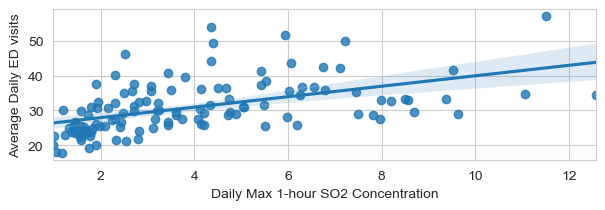

In [22]:
plt.figure(figsize=(7,2), dpi = 100)
sns.regplot(x = 'Daily Max 1-hour SO2 Concentration', y = 'avg_daily_ED_visit', data = df_data)
plt.xlabel('Daily Max 1-hour SO2 Concentration')
plt.ylabel('Average Daily ED visits')

#### Step 3 - 4. Q3 - Is Daily Max 8-hour Ozone Concentration different when the average daily ED visits over ten-year average?

Text(0, 0.5, '')

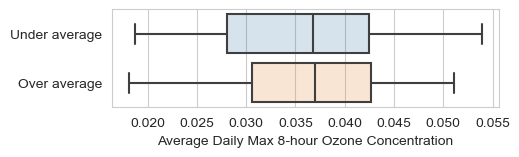

In [23]:
plt.figure(figsize=(5,1.3), dpi = 100)

# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.boxplot(x = 'Daily Max 8-hour Ozone Concentration', y = 'over_average', data = df_data, orient = "h")

# adding transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .2))

ax.set_yticklabels(('Under average', 'Over average'))
plt.xlabel('Average Daily Max 8-hour Ozone Concentration')
plt.ylabel('')

#### Step 3 - 5. Q4 - Do the concentration of air pollutants and daily ED visits in Iowa skew?

Text(0.5, 1.0, 'The skewness of each feature')

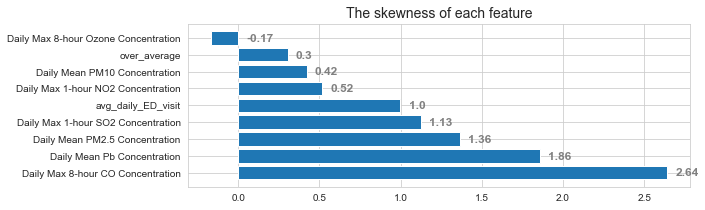

In [24]:
df_skew = df_data.drop(['year', 'month'], axis = 1)

skew_feat = df_skew.apply(lambda x: skew(x)).sort_values(ascending = False)
df_sk = pd.DataFrame(data = skew_feat, columns = ['skewness'])
fig, ax = plt.subplots(figsize =(9, 3))
ax.barh(df_sk.index, df_sk['skewness'])


# Add annotation to bars
for i in ax.patches:
    plt.text(max(i.get_width(), 0) + 0.05, 
             i.get_y() + 0.2,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
plt.title('The skewness of each feature', fontsize = 14)

In [25]:
high_skew = skew_feat[ abs(skew_feat) > 0.5]
high_skew

Daily Max 8-hour CO Concentration     2.641053
Daily Mean Pb Concentration           1.855526
Daily Mean PM2.5 Concentration        1.362696
Daily Max 1-hour SO2 Concentration    1.125926
avg_daily_ED_visit                    0.998770
Daily Max 1-hour NO2 Concentration    0.518194
dtype: float64

#### Step 3 - 6. Q4 - What are the correlation coefficients of each feature and average daily visits?

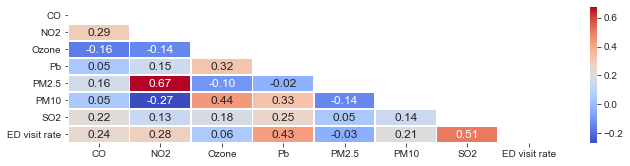

In [26]:
df_corr = df_data.rename(columns = {'avg_daily_ED_visit'                   : 'ED visit rate',
                                    'Daily Mean PM10 Concentration'        : 'PM10',
                                    'Daily Mean PM2.5 Concentration'       : 'PM2.5',
                                    'Daily Max 1-hour NO2 Concentration'   : 'NO2',
                                    'Daily Max 1-hour SO2 Concentration'   : 'SO2',
                                    'Daily Max 8-hour CO Concentration'    : 'CO',
                                    'Daily Max 8-hour Ozone Concentration' : 'Ozone',
                                    'Daily Mean Pb Concentration'          : 'Pb'})
df_corr = df_corr.drop(['year', 'month', 'over_average'], axis = 1)
df_corr = df_corr[['CO', 'NO2', 'Ozone', 'Pb', 'PM2.5', 'PM10', 'SO2', 'ED visit rate']]
corr_matrix =  df_corr.corr()
corr_matrix

mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure( figsize = (11, 2.5))
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
sns.heatmap(corr_matrix, 
            cmap = 'coolwarm',
            mask = mask,
            fmt = '.2f', 
            linewidths = .5, 
            annot_kws = {'size': 12}, 
            annot = True)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### **Step 4. Developing a decision tree model**

In [27]:
# @markdown Step 4 - 1: Split data into training and testing set

x = pd.concat([df_corr, df_data[['year']]], axis = 1)
y = df_data.over_average

# The first 8-year data used for training
# The last 2-year data used for testing
x_train = x[x['year'] < 2018]
x_test  = x[x['year'] >= 2018]
y_train = y[:len(x_train)]
y_test  = y[len(x_train):]

x_train = x_train.drop(['year', 'ED visit rate'], axis = 1)
x_test  = x_test.drop(['year', 'ED visit rate'], axis = 1)

In [28]:
# @markdown Step 4 - 2: Develop a decision tree model

clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Text(0, 0.5, 'Testing Accuracy')

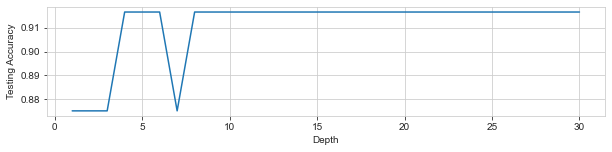

In [29]:
# @markdown Step 4 - 3: Check in which depth, the model has a better performance

depth_range = range(1,31)

accuracy = []
for i in depth_range:
    clf = DecisionTreeClassifier(criterion = "entropy" , max_depth = i, random_state = 6)
    clf.fit(x_train, y_train)
    Z = Series(clf.predict(x_test))
    accuracy.append(accuracy_score(Z, y_test))

plt.figure(figsize = (10, 2))
plt.plot(depth_range, accuracy)
plt.xlabel('Depth')
plt.ylabel('Testing Accuracy')

In [30]:
# Based on the result above, set the depth of the decision tree model for 4

clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9166666666666666

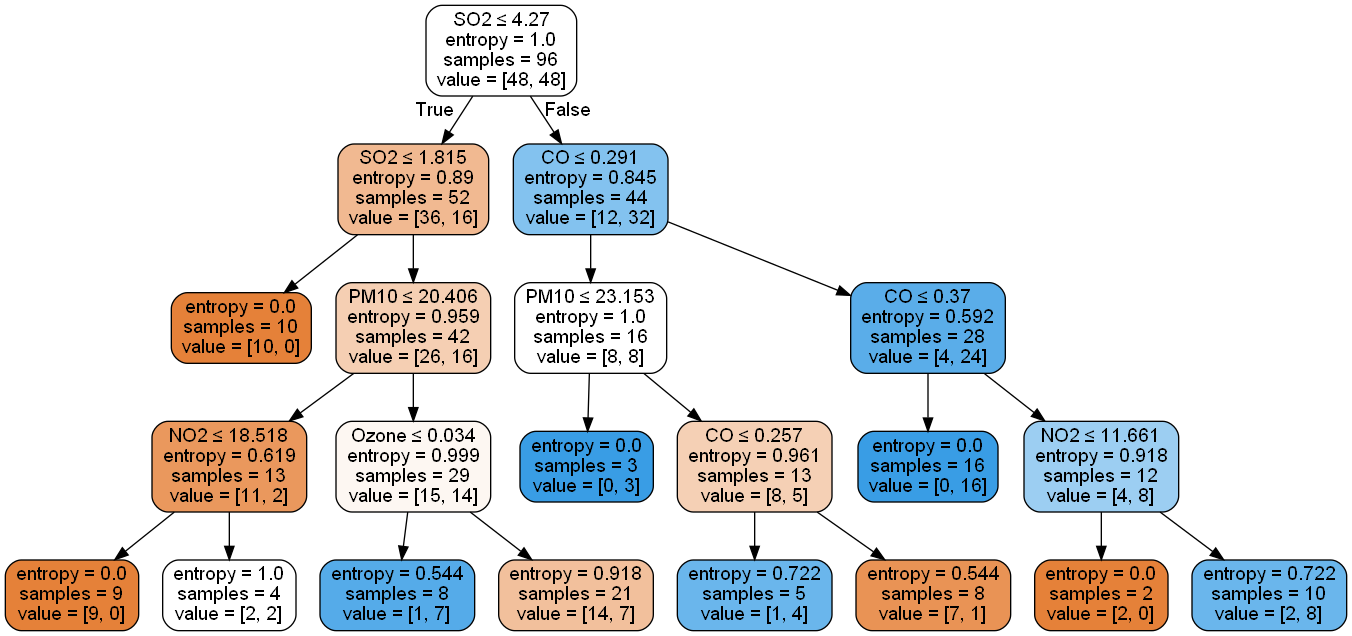

In [31]:
# @markdown Step 4 - 4: Visualize the structure of the decision tree model

feat_columns = x_train.columns
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, 
                feature_names = feat_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

Image(filename = 'tree.png', width = 600, height = 300)

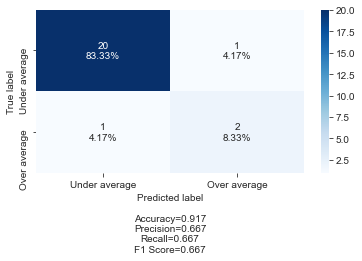

In [32]:
# @markdown Step 4 - 5: Evaluate the performance and plot a confusion matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)== cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
categories = ['Under average', 'Over average']
make_confusion_matrix(cf, categories = categories, figsize = (6, 3))

### **Step 5. Developing a linear regression model**

In [33]:
# @markdown Step 5 - 1: Take a log10 to all features

print('The first row of x_test before taking a log10:')
print(x_test[['PM10','PM2.5','NO2','SO2','CO','Ozone','Pb']].head(1))
df_log = df_data
feats = df_log.columns
for feat in feats:
    df_log[feat] = df_log[feat].apply(lambda x: np.log10(x))

The first row of x_test before taking a log10:
         PM10    PM2.5    NO2       SO2        CO     Ozone      Pb
96  22.686047  9.73486  13.23  1.717818  0.283133  0.026645  0.0306


In [34]:
# @markdown Step 5 - 2: Split data into training and testing set

x1 = df_log.drop(['avg_daily_ED_visit', 'year', 'month', 'over_average'], axis = 1)
y1 = df_log.avg_daily_ED_visit

x1_train = x1[:len(x_train)]
x1_test  = x1[len(x_train):]
y1_train = y1[:len(x_train)]
y1_test  = y1[len(x_train):]

print('The first row of x_test after taking a log10:')
x1_test.head(1)

The first row of x_test after taking a log10:


,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 1-hour SO2 Concentration,Daily Max 8-hour CO Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration
96,1.355759,0.98833,1.12156,0.234977,-0.54801,-1.574382,-1.514279


In [35]:
# @markdown Step 5 - 3: Develop a linear regression model and get the equation of it

clf_linear1 = LinearRegression()
clf_linear1.fit(x1_train, y1_train)

coeff_df = DataFrame( data = x1_train.columns, columns = ['Feature'])
coeff_df['Estimate Coefficient'] = Series(clf_linear1.coef_)
coeff_df.to_csv('group_coef_df.csv')
print(coeff_df, '\n')
print(clf_linear1.intercept_)

                                Feature  Estimate Coefficient
0         Daily Mean PM10 Concentration              0.242006
1        Daily Mean PM2.5 Concentration             -0.293454
2    Daily Max 1-hour NO2 Concentration              0.376133
3    Daily Max 1-hour SO2 Concentration              0.138881
4     Daily Max 8-hour CO Concentration              0.018727
5  Daily Max 8-hour Ozone Concentration             -0.127279
6           Daily Mean Pb Concentration              0.050428 

0.8342337314439406


In [38]:
# @markdown Step 5 - 4: Evaluate the performance of the linear regression model

# 5 - 4 - 1: The mean square error of training set
p_y1_train = clf_linear1.predict(x1_train)
# Exponential the result back to the original value
preds_real_train = list(zip(10 ** p_y1_train, 10 ** y1_train))
df_train = pd.DataFrame(preds_real_train, columns=['Preds','Real'])
df_train.head(3).to_csv('train_pred_value.csv')
print('The rmse of training set:')
print(np.sqrt( np.mean( (df_train['Preds'] - df_train['Real'] ) ** 2 ) ), '\n\n')


# 5 - 4 - 2: The mean square error of testing set
p_y1_test  = clf_linear1.predict(x1_test)
preds_real_test = list(zip(10 ** p_y1_test, 10 ** y1_test))
df_test = pd.DataFrame(preds_real_test, columns=['Preds','Real'])
df_test.head(3).to_csv('test_pred_value.csv')
print('The rmse of testing set:')
print(np.sqrt( np.mean( (df_test['Preds'] - df_test['Real'] ) ** 2 )))

The rmse of training set:
5.635427812647759 


The rmse of testing set:
3.8732048056003094


### **Conclusion**
1. Correlation coefficients: SO2 and Pb concentration has the highest and the second highest correlation with the ED visit rate in Iowa. 
2. The decision tree model: SO2 concentration > 4.27 and  CO concentration > 0.291 these two conditions pose a higher risk to asthma attacks.
3. The linear regression model: The equation for predicting an ED visit rate for asthma is F(x) = 0.242 * PM10 - 0.293 * PM2.5 + 0.376 * NO2 + 0.139 *SO2 + 0.019 * CO - 0.127 * O3 + 0.050 * Pb + 0.834.

### **Reference**
- Pandas.merge. (n.d.). Retrieved June 26, 2021, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html
- Aafa. (n.d.). Retrieved May 20, 2021, from https://www.aafa.org/asthma-facts/ (Asthma statistics)
- Health. (n.d.). Retrieved May 22, 2021, from https://tracking.idph.iowa.gov/Health/Asthma/Asthma-ED-Visits (ED data)
- AirData website file download page. (n.d.). Retrieved May 21, 2021, from https://aqs.epa.gov/aqsweb/airdata/download_files.html (Air pollutant data)
- Bluman, A. G. (2019). In Elementary statistics: A step by step approach. Vancouver, B.C.: Langara College.
- Mouradmourafiq. (n.d.). Mouradmourafiq/pandas-summary. Retrieved June 27, 2021, from https://github.com/mouradmourafiq/pandas-summary/blob/master/pandas_summary/__init__.py
- T, D. (2019, July 25). Confusion matrix visualization. Retrieved June 27, 2021, from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea